In [1]:
import h5py
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sbn
from tqdm.notebook import  tqdm, trange

In [2]:
pts = gpd.read_file('../../CIAT/data/BEM_2019_Chiapas_Final_Clean.gpkg')
pts['SIM'] = ['CH{0:05d}'.format(i + 1) for i in range(len(pts))]
pts = pts.set_index('SIM')


In [ ]:
yield_dm = []
dm_file = '../data/PSCE_dm.h5'
with pd.HDFStore(dm_file) as store:
    for key in tqdm(store.keys()):
        nrows = store.get_storer(key).shape[0]
        ldf = store.select(key, start=nrows-1, stop=nrows)
        ldf['SIM'] = key[1:]
        yield_dm.append(ldf)
        
yield_dm = pd.concat(yield_dm)
yield_dm = yield_dm.reset_index().set_index('SIM')

In [3]:
yield_np = []
np_file = '../data/PSCE.h5'
with pd.HDFStore(np_file) as store:
    for key in tqdm(store.keys()):
        nrows = store.get_storer(key).shape[0]
        ldf = store.select(key, start=nrows-1, stop=nrows)
        ldf['SIM'] = key[1:]
        yield_np.append(ldf)
        
yield_np = pd.concat(yield_np)
yield_np = yield_np.reset_index().set_index('SIM')

In [4]:
yield_df = pd.merge(yield_np, yield_dm, on = 'SIM', how = 'inner', suffixes=('_np', '_dm'))

In [29]:
yield_df['Yield'] = 1e3 * pts.rendimiento_final

(<matplotlib.axes._subplots.AxesSubplot at 0x7fd02c69a690>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd02c69a690>)

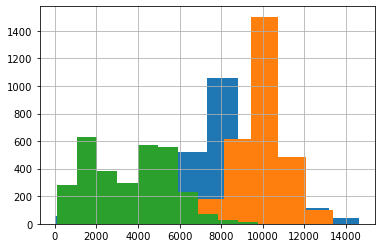

In [30]:
yield_df.TWSO_dm.hist(), yield_df.TWSO_np.hist(), yield_df.Yield.hist()

(<matplotlib.axes._subplots.AxesSubplot at 0x7fd0e8bf8d10>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd0e8bf8d10>)

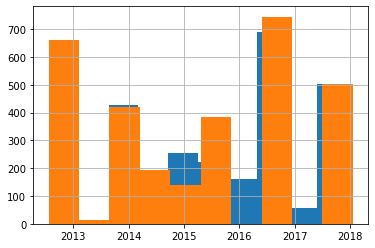

In [6]:
yield_df.day_np.hist(), yield_df.day_dm.hist()

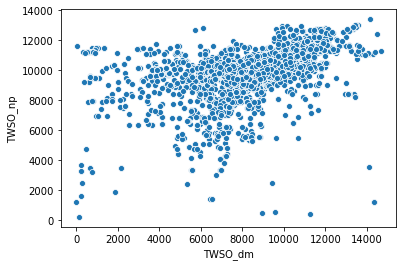

In [7]:
sbn.scatterplot('TWSO_dm', 'TWSO_np', data = yield_df)

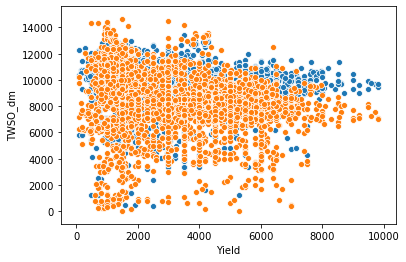

In [32]:
sbn.scatterplot('Yield', 'TWSO_np', data = yield_df)
sbn.scatterplot('Yield', 'TWSO_dm', data = yield_df)


In [38]:
np.corrcoef([yield_df.Yield, yield_df.TWSO_np, yield_df.TWSO_dm])

array([[ 1.        , -0.04962069, -0.15669793],
       [-0.04962069,  1.        ,  0.41612975],
       [-0.15669793,  0.41612975,  1.        ]])